In [65]:
import sys, os, time, json, pickle
from timeit import default_timer as timer
from humanfriendly import format_timespan
from glob import glob

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [67]:
%matplotlib inline

In [68]:
from dotenv import load_dotenv
load_dotenv('admin.env')

True

In [69]:
from mysql_connect import get_db_connection
db = get_db_connection('jp_autoreview')

In [70]:
start = timer()
df = db.read_sql(db.tables['pipeline_tests'].select())
print(format_timespan(timer()-start))

0.52 seconds


In [71]:
df.set_index('id', inplace=True)

In [72]:
top_results = df.sort_values('score_correctly_predicted', ascending=False).drop_duplicates(['review_paper_id', 'random_seed'])

In [73]:
def get_paper_info(datadir):
    g = glob(os.path.join(datadir, '..', '*paperinfo.json'))
    if len(g) != 1:
        raise RuntimeError("failed to find paper info")
    return pd.read_json(os.path.join(g[0]), typ='series')

In [74]:
start = timer()
data = []
for id, row in top_results.iterrows():
    this_row_data = get_paper_info(row.datadir)
    this_row_data['id'] = id
    data.append(this_row_data)
paperinfo = pd.DataFrame(data).set_index('id')
print(format_timespan(timer()-start))

2.29 seconds


In [75]:
top_results = top_results.join(paperinfo[['wos_title', 'mag_EF', 'doi', 'wos_title_source']])

In [76]:
top_results.drop_duplicates('review_paper_id')

,datetime_added,review_paper_id,random_seed,datadir,num_correctly_predicted,num_target_papers,num_target_in_candidates,num_seed_papers,score_correctly_predicted,num_candidates,features,clf,clf_type,time_fit,time_predict,saved_model,wos_title,mag_EF,doi,wos_title_source
id,,,,,,,,,,,,,,,,,,,,
38265,2018-06-26 11:15:15,1836476934,2,data/review_1836476934/seed_002,1954,3396,3392,50,0.575383,407149,"['avg_distance_to_train', 'ef', 'avg_title_tfi...","RandomForestClassifier(bootstrap=True, class_w...",RandomForestClassifier,99,98,data/review_1836476934/seed_002/best_model_201...,Molecular imprinting science and technology: a...,2.810000e-08,10.1002/jmr.2347,JOURNAL OF MOLECULAR RECOGNITION
38755,2018-06-26 12:57:28,2035931858,4,data/review_2035931858/seed_004,1062,2153,2151,50,0.493265,162599,"['avg_distance_to_train', 'ef', 'avg_title_tfi...","RandomForestClassifier(bootstrap=True, class_w...",RandomForestClassifier,184,184,data/review_2035931858/seed_004/best_model_201...,Crystallinity of inorganic films grown by atom...,9.090000e-08,10.1063/1.4757907,JOURNAL OF APPLIED PHYSICS
38064,2018-06-26 11:08:15,1482776739,1,data/review_1482776739/seed_001,275,726,712,50,0.378788,51470,"['avg_distance_to_train', 'ef', 'avg_title_tfi...","RandomForestClassifier(bootstrap=True, class_w...",RandomForestClassifier,10,10,data/review_1482776739/seed_001/best_model_201...,Chemical modification of starch,4.410000e-08,10.1016/S0065-2318(04)59005-4,ADVANCES IN CARBOHYDRATE CHEMISTRY AND BIOCHEM...
38674,2018-06-26 12:15:48,2096210343,4,data/review_2096210343/seed_004,890,2663,2642,50,0.334210,408446,"['avg_distance_to_train', 'ef', 'avg_title_tfi...","RandomForestClassifier(bootstrap=True, class_w...",RandomForestClassifier,576,210,data/review_2096210343/seed_004/best_model_201...,Allergic rhinitis and its impact on asthma,7.849000e-07,10.1067/mai.2001.118891,JOURNAL OF ALLERGY AND CLINICAL IMMUNOLOGY
38313,2018-06-26 11:36:43,2097435698,2,data/review_2097435698/seed_002,398,2073,2070,50,0.191992,181792,"['avg_distance_to_train', 'ef', 'avg_title_tfi...","RandomForestClassifier(bootstrap=True, class_w...",RandomForestClassifier,81,41,data/review_2097435698/seed_002/best_model_201...,QCD and strongly coupled gauge theories: chall...,3.940000e-08,10.1140/epjc/s10052-014-2981-5,EUROPEAN PHYSICAL JOURNAL C
39018,2018-06-26 12:25:56,2055588023,5,data/review_2055588023/seed_005,495,2646,2626,50,0.187075,738420,"['avg_distance_to_train', 'ef', 'avg_title_tfi...","RandomForestClassifier(bootstrap=True, class_w...",RandomForestClassifier,1449,1297,None,Synaptic plasticity and cell cycle activation ...,2.120000e-08,10.1016/j.pneurobio.2003.09.007,PROGRESS IN NEUROBIOLOGY
39050,2018-06-26 15:49:48,2401448071,5,data/review_2401448071/seed_005,214,1243,1242,50,0.172164,158942,"['avg_distance_to_train', 'ef', 'avg_title_tfi...","LogisticRegression(C=1.0, class_weight='balanc...",LogisticRegression,191,236,None,Use of Bromine and Bromo-Organic Compounds in ...,1.480000e-08,10.1021/acs.chemrev.5b00400,CHEMICAL REVIEWS
39052,2018-06-26 12:53:02,2082369948,2,data/review_2082369948/seed_002,359,2480,2470,50,0.144758,458202,"['avg_distance_to_train', 'ef', 'avg_title_tfi...","RandomForestClassifier(bootstrap=True, class_w...",RandomForestClassifier,1692,901,None,The neurobiology and control of anxious states,1.022000e-07,10.1016/s0301-0082(03)00087-X,PROGRESS IN NEUROBIOLOGY
38655,2018-06-26 11:50:10,2073570537,2,data/review_2073570537/seed_002,526,3670,3657,50,0.143324,572782,"['avg_distance_to_train', 'ef', 'avg_title_tfi...","RandomForestClassifier(bootstrap=True, class_w...",RandomForestClassifier,857,416,data/review_2073570537/seed_002/best_model_201...,Multi-target strategies for the improved treat...,5.060000e-08,10.1016/j.pharmthera.2005.11.006,PHARMACOLOGY & THERAPEUTICS


In [77]:
wos_source = pd.read_table('data/wos_title_sources_subjects.tsv')

In [78]:
gb = wos_source.groupby('title_source')
wos_source['num_entries'] = wos_source.title_source.map(gb.title_source.count())

In [79]:
wos_source.sort_values(['num_entries', 'title_source'], ascending=[False, True])

,title_source,title_source_abbrev,subject_extended,subject_traditional,heading,subheading,num_entries
23655,ARTIFICIAL INTELLIGENCE IN EDUCATION,FR ART INT,Computer Science,"Computer Science, Artificial Intelligence; Com...",Science & Technology,Technology,9.0
23656,ARTIFICIAL INTELLIGENCE IN EDUCATION,FR ART INT,Computer Science,"Computer Science, Artificial Intelligence; Com...",Science & Technology,Technology,9.0
23657,ARTIFICIAL INTELLIGENCE IN EDUCATION,FR ART INT,Computer Science; Education & Educational Rese...,"Computer Science, Artificial Intelligence; Com...",Science & Technology,Technology,9.0
23658,ARTIFICIAL INTELLIGENCE IN EDUCATION,FR ART INT,Computer Science; Education & Educational Rese...,"Computer Science, Artificial Intelligence; Com...",Science & Technology,Technology,9.0
23659,ARTIFICIAL INTELLIGENCE IN EDUCATION,FRONT ARTIF INTEL AP,Computer Science,"Computer Science, Artificial Intelligence; Com...",Science & Technology,Technology,9.0
23660,ARTIFICIAL INTELLIGENCE IN EDUCATION,FRONT ARTIF INTEL AP,Computer Science,"Computer Science, Artificial Intelligence; Com...",Science & Technology,Technology,9.0
23661,ARTIFICIAL INTELLIGENCE IN EDUCATION,FRONT ARTIF INTEL AP,Computer Science; Education & Educational Rese...,"Computer Science, Artificial Intelligence; Com...",Science & Technology,Technology,9.0
23662,ARTIFICIAL INTELLIGENCE IN EDUCATION,FRONT ARTIF INTEL AP,Computer Science; Education & Educational Rese...,"Computer Science, Artificial Intelligence; Com...",Science & Technology,Technology,9.0
23663,ARTIFICIAL INTELLIGENCE IN EDUCATION,LECT NOTES ARTIF INT,Computer Science,"Computer Science, Artificial Intelligence; Com...",Science & Technology,Technology,9.0
73902,HIGH PERFORMANCE COMPUTING SYSTEMS AND APPLICA...,NaN,Computer Science,"Computer Science, Interdisciplinary Applicatio...",Science & Technology,Technology,9.0


In [80]:
wos_source.nunique()

title_source           164411
title_source_abbrev     31732
subject_extended        11638
subject_traditional     20956
heading                     3
subheading                  3
num_entries                 9
dtype: int64

In [81]:
wos_source[['title_source', 'heading', 'subheading', 'num_entries']].drop_duplicates()

,title_source,heading,subheading,num_entries
0,NaN,NaN,NaN,NaN
1,'92 ELECTROWEAK INTERACTIONS AND UNIFIED THEORIES,Science & Technology,Physical Sciences,1.0
2,'93 ELECTROWEAK INTERACTIONS AND UNIFIED THEORIES,Science & Technology,Physical Sciences,1.0
3,'94 ELECTROWEAK INTERACTIONS AND UNIFIED THEORIES,Science & Technology,Physical Sciences,1.0
4,'95 ELECTROWEAK INTERACTIONS AND UNIFIED THEORIES,Science & Technology,Physical Sciences,1.0
5,'95 QCD AND HIGH ENERGY HADRONIC INTERACTIONS,Science & Technology,Physical Sciences,1.0
6,"'96 CHINA-JAPAN SYMPOSIUM ON PARTICUOLOGY, PRO...",Science & Technology,Technology,1.0
7,'97 NANJING INTERNATIONAL SYMPOSIUM ON HIGH YI...,Science & Technology,Technology,1.0
8,'99 INTERNATIONAL CONFERENCE ON MANAGEMENT SCI...,Science & Technology,Technology,1.0
9,'ABBASID STUDIES,Arts & Humanities,NaN,1.0


In [82]:
top_results = top_results.merge(wos_source.drop_duplicates(subset=['title_source']), how='left', left_on='wos_title_source', right_on='title_source')

In [83]:
x = top_results.drop_duplicates('review_paper_id').dropna(subset=['heading']).reset_index()
x[x.heading=="Science & Technology"]

,index,datetime_added,review_paper_id,random_seed,datadir,num_correctly_predicted,num_target_papers,num_target_in_candidates,num_seed_papers,score_correctly_predicted,...,mag_EF,doi,wos_title_source,title_source,title_source_abbrev,subject_extended,subject_traditional,heading,subheading,num_entries
0,0,2018-06-26 11:15:15,1836476934,2,data/review_1836476934/seed_002,1954,3396,3392,50,0.575383,...,2.810000e-08,10.1002/jmr.2347,JOURNAL OF MOLECULAR RECOGNITION,JOURNAL OF MOLECULAR RECOGNITION,J MOL RECOGNIT,Biochemistry & Molecular Biology; Biophysics,Biochemistry & Molecular Biology; Biophysics,Science & Technology,Life Sciences & Biomedicine,1.0
1,5,2018-06-26 12:57:28,2035931858,4,data/review_2035931858/seed_004,1062,2153,2151,50,0.493265,...,9.090000e-08,10.1063/1.4757907,JOURNAL OF APPLIED PHYSICS,JOURNAL OF APPLIED PHYSICS,J APPL PHYS,Physics,"Physics, Applied",Science & Technology,Physical Sciences,1.0
2,10,2018-06-26 11:08:15,1482776739,1,data/review_1482776739/seed_001,275,726,712,50,0.378788,...,4.410000e-08,10.1016/S0065-2318(04)59005-4,ADVANCES IN CARBOHYDRATE CHEMISTRY AND BIOCHEM...,ADVANCES IN CARBOHYDRATE CHEMISTRY AND BIOCHEM...,ADV CARBOHYD CHEM BI,Biochemistry & Molecular Biology; Chemistry,"Biochemistry & Molecular Biology; Chemistry, O...",Science & Technology,Life Sciences & Biomedicine,1.0
3,14,2018-06-26 12:15:48,2096210343,4,data/review_2096210343/seed_004,890,2663,2642,50,0.334210,...,7.849000e-07,10.1067/mai.2001.118891,JOURNAL OF ALLERGY AND CLINICAL IMMUNOLOGY,JOURNAL OF ALLERGY AND CLINICAL IMMUNOLOGY,J ALLERGY CLIN IMMUN,Allergy; Immunology,Allergy; Immunology,Science & Technology,Life Sciences & Biomedicine,1.0
4,20,2018-06-26 11:36:43,2097435698,2,data/review_2097435698/seed_002,398,2073,2070,50,0.191992,...,3.940000e-08,10.1140/epjc/s10052-014-2981-5,EUROPEAN PHYSICAL JOURNAL C,EUROPEAN PHYSICAL JOURNAL C,EUR PHYS J C,Physics,"Physics, Particles & Fields",Science & Technology,Physical Sciences,1.0
5,21,2018-06-26 12:25:56,2055588023,5,data/review_2055588023/seed_005,495,2646,2626,50,0.187075,...,2.120000e-08,10.1016/j.pneurobio.2003.09.007,PROGRESS IN NEUROBIOLOGY,PROGRESS IN NEUROBIOLOGY,PROG NEUROBIOL,Neurosciences & Neurology,Neurosciences,Science & Technology,Life Sciences & Biomedicine,1.0
6,25,2018-06-26 15:49:48,2401448071,5,data/review_2401448071/seed_005,214,1243,1242,50,0.172164,...,1.480000e-08,10.1021/acs.chemrev.5b00400,CHEMICAL REVIEWS,CHEMICAL REVIEWS,CHEM REV,Chemistry,"Chemistry, Multidisciplinary",Science & Technology,Physical Sciences,1.0
7,32,2018-06-26 12:53:02,2082369948,2,data/review_2082369948/seed_002,359,2480,2470,50,0.144758,...,1.022000e-07,10.1016/s0301-0082(03)00087-X,PROGRESS IN NEUROBIOLOGY,PROGRESS IN NEUROBIOLOGY,PROG NEUROBIOL,Neurosciences & Neurology,Neurosciences,Science & Technology,Life Sciences & Biomedicine,1.0
8,33,2018-06-26 11:50:10,2073570537,2,data/review_2073570537/seed_002,526,3670,3657,50,0.143324,...,5.060000e-08,10.1016/j.pharmthera.2005.11.006,PHARMACOLOGY & THERAPEUTICS,PHARMACOLOGY & THERAPEUTICS,PHARMACOL THERAPEUT,Pharmacology & Pharmacy,Pharmacology & Pharmacy,Science & Technology,Life Sciences & Biomedicine,1.0
9,37,2018-06-26 14:42:08,2068700715,1,data/review_2068700715/seed_001,262,2009,2007,50,0.130413,...,1.490000e-08,10.1021/cr030440j,CHEMICAL REVIEWS,CHEMICAL REVIEWS,CHEM REV,Chemistry,"Chemistry, Multidisciplinary",Science & Technology,Physical Sciences,1.0


In [84]:
x = top_results.drop_duplicates('review_paper_id')
x[x.heading.isna()]

,datetime_added,review_paper_id,random_seed,datadir,num_correctly_predicted,num_target_papers,num_target_in_candidates,num_seed_papers,score_correctly_predicted,num_candidates,...,mag_EF,doi,wos_title_source,title_source,title_source_abbrev,subject_extended,subject_traditional,heading,subheading,num_entries


In [85]:
df.nunique()

datetime_added                81
review_paper_id               13
random_seed                    5
datadir                       63
num_correctly_predicted      543
num_target_papers             13
num_target_in_candidates      33
num_seed_papers                1
score_correctly_predicted    747
num_candidates                63
features                       2
clf                           12
clf_type                       6
time_fit                     494
time_predict                 444
saved_model                   63
dtype: int64

In [86]:
top_results.mean().apply(lambda x: format(x, 'f'))

review_paper_id              2049971625.920635
random_seed                           2.936508
num_correctly_predicted             505.111111
num_target_papers                  2296.380952
num_target_in_candidates           2289.444444
num_seed_papers                      50.000000
score_correctly_predicted             0.216147
num_candidates                   444132.936508
time_fit                            550.238095
time_predict                        455.682540
mag_EF                                0.000000
num_entries                           1.000000
dtype: object

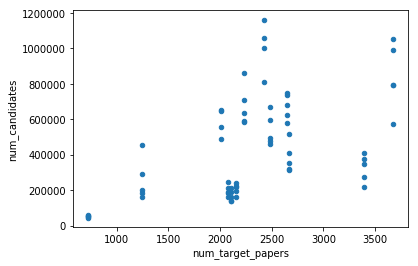

In [87]:
top_results.plot.scatter(x='num_target_papers', y='num_candidates')

(0, 1000000.0)

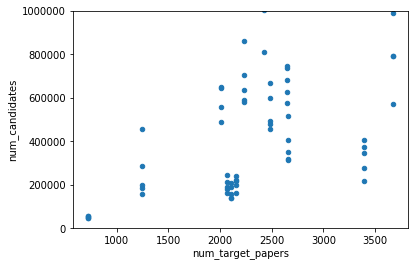

In [88]:
top_results.plot.scatter(x='num_target_papers', y='num_candidates').set_ylim(0,1e6)

In [89]:
top_results.corr()

,review_paper_id,random_seed,num_correctly_predicted,num_target_papers,num_target_in_candidates,num_seed_papers,score_correctly_predicted,num_candidates,time_fit,time_predict,mag_EF,num_entries
review_paper_id,1.000000,-0.014362,-0.303185,0.164227,0.166740,NaN,-0.565199,0.317144,0.239855,0.313075,0.043689,NaN
random_seed,-0.014362,1.000000,-0.010047,0.004690,0.004615,NaN,-0.011048,-0.021712,0.120033,0.083571,0.015462,NaN
num_correctly_predicted,-0.303185,-0.010047,1.000000,0.495082,0.495912,NaN,0.868737,-0.204833,-0.202727,-0.316952,0.204669,NaN
num_target_papers,0.164227,0.004690,0.495082,1.000000,0.999960,NaN,0.074125,0.534952,0.376405,0.333555,0.158285,NaN
num_target_in_candidates,0.166740,0.004615,0.495912,0.999960,1.000000,NaN,0.073833,0.533769,0.373603,0.332523,0.153385,NaN
num_seed_papers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
score_correctly_predicted,-0.565199,-0.011048,0.868737,0.074125,0.073833,NaN,1.000000,-0.485896,-0.376686,-0.506064,0.197605,NaN
num_candidates,0.317144,-0.021712,-0.204833,0.534952,0.533769,NaN,-0.485896,1.000000,0.668275,0.828484,-0.063629,NaN
time_fit,0.239855,0.120033,-0.202727,0.376405,0.373603,NaN,-0.376686,0.668275,1.000000,0.873079,0.054724,NaN
time_predict,0.313075,0.083571,-0.316952,0.333555,0.332523,NaN,-0.506064,0.828484,0.873079,1.000000,-0.101925,NaN


In [90]:
num_target_not_in_candidate = top_results.num_target_papers - top_results.num_target_in_candidates
num_target_not_in_candidate.value_counts().sort_index()

0      9
1     11
2      9
3      2
4      3
6      3
7      1
9      1
10     6
11     2
12     3
13     2
14     1
18     1
19     3
20     3
21     3
dtype: int64

In [91]:
def get_subj_ext_first(subj_ext):
    if pd.notnull(subj_ext):
        split = subj_ext.split('; ')
        return split[0]
    return None
top_results['subject_extended_first'] = top_results.subject_extended.apply(get_subj_ext_first)

In [92]:
top_results.subject_extended_first.value_counts()

Physics                             15
Neurosciences & Neurology           10
Biochemistry & Molecular Biology    10
Chemistry                            9
Thermodynamics                       5
Allergy                              5
Pharmacology & Pharmacy              5
Genetics & Heredity                  4
Name: subject_extended_first, dtype: int64

In [93]:
top_results[top_results.subject_extended_first=='Computer Science'][['review_paper_id', 'num_target_papers', 'score_correctly_predicted', 'num_candidates', 'wos_title', 'wos_title_source', 'subject_extended']]

,review_paper_id,num_target_papers,score_correctly_predicted,num_candidates,wos_title,wos_title_source,subject_extended


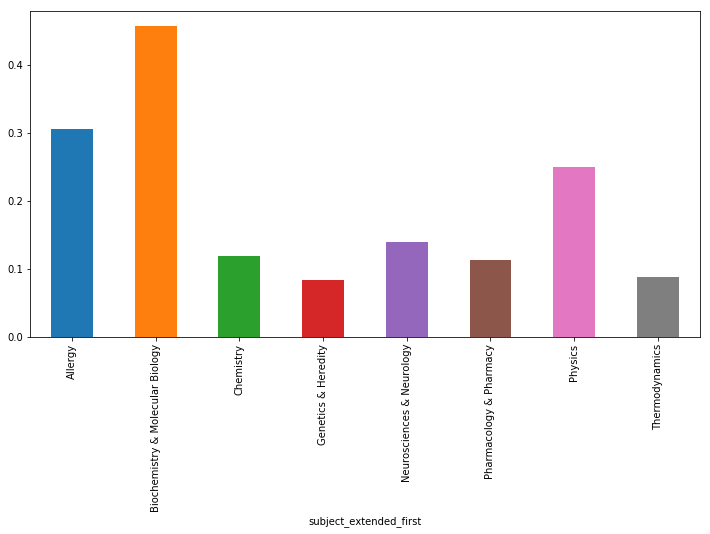

In [94]:
top10 = top_results.subject_extended_first.value_counts()[:10].index
x = top_results[top_results.subject_extended_first.isin(top10)]
gb = x.groupby('subject_extended_first')
plt.figure(figsize=(12,6))
gbmean = gb['score_correctly_predicted'].mean()
gbmean.plot.bar()

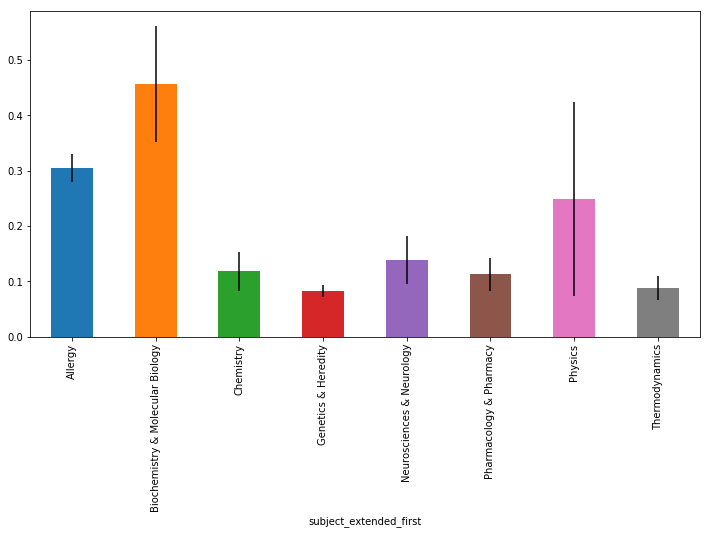

In [95]:
top20 = top_results.subject_extended_first.value_counts()[:20].index
x = top_results[top_results.subject_extended_first.isin(top20)]
gb = x.groupby('subject_extended_first')
plt.figure(figsize=(12,6))
gbmean = gb['score_correctly_predicted'].mean()
gberrs = gb['score_correctly_predicted'].std()
gbmean.plot.bar(yerr=gberrs)

In [96]:
top_results[top_results.num_target_papers>50].score_correctly_predicted.describe()

count    63.000000
mean      0.216147
std       0.157990
min       0.052306
25%       0.098001
50%       0.150442
75%       0.323820
max       0.575383
Name: score_correctly_predicted, dtype: float64